In [38]:
import cv2 
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import keras
import gc
import pickle

# **PROCESAR DATOS**

In [0]:
import zipfile
zip_ref =zipfile.ZipFile('/content/drive/My Drive/AsuMayo.zip','r')
zip_ref.extractall("/content/drive/My Drive/Vision/")
zip_ref.close()

In [0]:
#path_classes="/content/drive/My Drive/Vision/AsuMayo/AsuMayoTest/"
path_classes="/content/drive/My Drive/Vision/AsuMayo/AsuMayoTrain/"
classes_names = os.listdir(path_classes)
for i in range(len(classes_names)):
  nombre=classes_names[i]
  #os.makedirs("AsuMayo/AsuMayoTest/"+str(nombre[:-4]))
  os.makedirs("AsuMayo/AsuMayoTrain/"+str(nombre[:-4]))

In [0]:
for i in range(len(classes_names)):
    video=classes_names[i]
    video_path = "/content/drive/My Drive/Vision/AsuMayo/AsuMayoTest/"+video
    #video_path = "/content/drive/My Drive/Vision/AsuMayo/AsuMayoTrain/"+video
    cap = cv2.VideoCapture(video_path)
    frames,nombres = [],[]
    cont=1
    while(cap.isOpened()):
        ret,frame=cap.read()
        if not ret:
            break
        # append the frames to list
        frames.append(frame)
        if(cont<=9):
            nombres.append("frame-000"+str(cont))
        if(cont>=10 and cont <=99):
            nombres.append("frame-00"+str(cont))
        if(cont>=100 and cont <=999):
            nombres.append("frame-0"+str(cont))
        if(cont>=1000):
            nombres.append("frame-"+str(cont))
        cont+=1
        print(video[:-4])
    cont2=0
    for frame in frames:
    img = cv2.resize(frame, (256, 256)) 
    cv2.imwrite("./AsuMayo/AsuMayoTest/"+video[:-4]+"/"+nombres[cont2]+".png", img)
    #cv2.imwrite("./AsuMayo/AsuMayoTrain/"+video[:-4]+"/"+nombres[cont2]+".png", img)
    cont2+=1

In [0]:
path_classes_train="/content/drive/My Drive/Vision/AsuMayo/AsuMayoTrain/"
path_classes_test="/content/drive/My Drive/Vision/AsuMayo/AsuMayoTest/"
classes_names_train = os.listdir(path_classes_train)
classes_names_test = os.listdir(path_classes_test)

array_imgsTr,array_imgsTe,x_train,x_test,y_train,y_test=[],[],[],[],[],[]
for i,name_class in enumerate(classes_names_train):    
    array_imgsTr=array_imgsTr+[path_classes_train+name_class+"/"+s for s in os.listdir(path_classes_train+classes_names_train[i])]
imgs_train=np.array(array_imgsTr)

for i,name_class in enumerate(classes_names_test):    
    array_imgsTe=array_imgsTe+[path_classes_test+name_class+"/"+s for s in os.listdir(path_classes_test+classes_names_test[i])]
imgs_test=np.array(array_imgsTe)

print ("ASU MAYO\n")
print("Videos Train: ",len(classes_names_train))
print("Videos Test: ",len(classes_names_test))


dic_classes_train = {}
for index, name in enumerate(classes_names_train):
    if(name[8:10]=="np"):
        dic_classes_train[name] = 0 #0 significa que no hay pólipo
    else: 
        dic_classes_train[name] = 1 #1 significa que si hay pólipo

dic_classes_test = {}
for index, name in enumerate(classes_names_test):
    if(name[-2:]=="np"):
        dic_classes_test[name] = 0 #0 significa que
    else:
        dic_classes_test[name] = 1 #1 significa que si hay pólipo

print("Etiquetas test: ",dic_classes_test) 
print("Etiquetas train: ",dic_classes_train) 
print("X_train: ", len(imgs_train), " X_test:",len(imgs_test), " Total: ", len(imgs_train)+len(imgs_test))
tam1=int(len(imgs_train)/2)
tam2=int(len(imgs_test)/2)
imgs_train1=imgs_train[0:tam1]
imgs_test1=imgs_test[0:tam2]
print("X_train: ", len(imgs_train1), " X_test:",len(imgs_test1), " Total: ", len(imgs_train1)+len(imgs_test1))


['ShortVD_wp_70.wmv', 'ShortVD_wp_69.wmv', 'ShortVD_wp_68.wmv', 'ShortVD_wp_66.wmv', 'ShortVD_wp_49.wmv', 'ShortVD_wp_61.wmv', 'ShortVD_wp_52.wmv', 'ShortVD_wp_4.wmv', 'ShortVD_wp_2.wmv', 'ShortVD_wp_24.wmv', 'ShortVD_np_9.wmv', 'ShortVD_np_7.wmv', 'ShortVD_np_8.wmv', 'ShortVD_np_6.wmv', 'ShortVD_np_5.wmv', 'ShortVD_np_14.wmv', 'ShortVD_np_13.wmv', 'ShortVD_np_12.wmv', 'ShortVD_np_11.wmv', 'ShortVD_np_10.wmv']


NotADirectoryError: ignored

In [0]:
import gc
path_classes_train="./AsuMayo/AsuMayoTrain/"
path_classes_test="./AsuMayo/AsuMayoTest/"

x_train,x_test,y_train,y_test=[],[],[],[]
imgs_train=sorted(imgs_train)
for i in range(len(imgs_train1)):
    print(i)
    imagen_train=cv2.imread(path_classes_train+imgs_train1[i])
    x_train.append(imagen_train)
    etiquetaTrain=imgs_train1[i]
    y_train.append(dic_classes_train[etiquetaTrain[:-15]])  
    gc.collect();
    
pickle_train = open('train.pickle', 'wb')
pickle.dump((x_train, y_train), pickle_train)
pickle_train.close()

In [0]:
fileObject_train = open('train.pickle','rb')
infor_train = pickle.load(fileObject_train) 
X_train, Y_train= infor_train
X_train=np.array(X_train)
print(X_train.shape)

(9451, 256, 256, 3)


In [0]:
for i in range(len(imgs_test1)):
    print(i)
    imagen_test=cv2.imread(path_classes_test+imgs_test1[i])
    x_test.append(imagen_test)
    etiquetaTest=imgs_test1[i]
    y_test.append(dic_classes_test[etiquetaTest[:-15]])
    gc.collect();
    
pickle_test = open('test.pickle', 'wb')
pickle.dump((x_test, y_test), pickle_test)
pickle_test.close()

# **LEER DATOS DEL PICKLE CON UN OCTAVO DE LOS DATOS Y PCA**

In [16]:
from sklearn.decomposition import PCA

In [22]:
fileObject_train = open('./train_1_8.pickle','rb')
infor_train = pickle.load(fileObject_train) 
X_train, Y_train= infor_train

fileObject_test = open('./test_1_8.pickle','rb')
infor_test = pickle.load(fileObject_test) 
X_test, Y_test= infor_test

X_train,Y_train,X_test,Y_test=np.array(X_train),np.array(Y_train),np.array(X_test),np.array(Y_test)
print(X_train.shape)

(2362, 256, 256, 3)


In [23]:
X_train=np.reshape(X_train, newshape=(len(X_train),256*256*3))
X_test=np.reshape(X_test, newshape=(len(X_test),256*256*3))
pca = PCA(n_components=1024)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# **RED NEURONAL BASH**

In [29]:
import cv2 
import os
import numpy as np
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D,AveragePooling2D, Average
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from keras.utils import to_categorical
from tensorflow.python.keras.optimizers import Adam
from keras import metrics
import keras
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
optimizer = Adam(lr=1e-3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 30, 30, 64)        640       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_v1_65 (B (None, 28, 28, 64)        256       
_________________________________________________________________
activation_65 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 12, 12, 128)       73856     
__________

(Text(0.5, 1.0, 'Loss'),
 Text(0.5, 0, 'Epoch'),
 Text(0, 0.5, 'loss'))

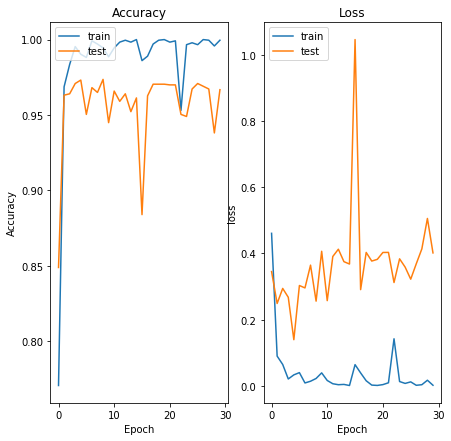

In [31]:
window=32
img_shape_full = (window,window,1)
img_size_flat = 1*window*window
num_classes = 2

model = Sequential()
model.add(InputLayer(input_shape=(img_size_flat,)))
model.add(Reshape(img_shape_full))
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Flatten())      
model.add(Dense(units=120))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(units=84))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(num_classes,activation = 'softmax'))
model.save_weights('redLina.h5')
model.summary()

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,Y_train,batch_size=8, epochs=30, validation_data=(X_test,Y_test))

(Text(0.5, 1.0, 'Loss'),
 Text(0.5, 0, 'Epoch'),
 Text(0, 0.5, 'loss'))

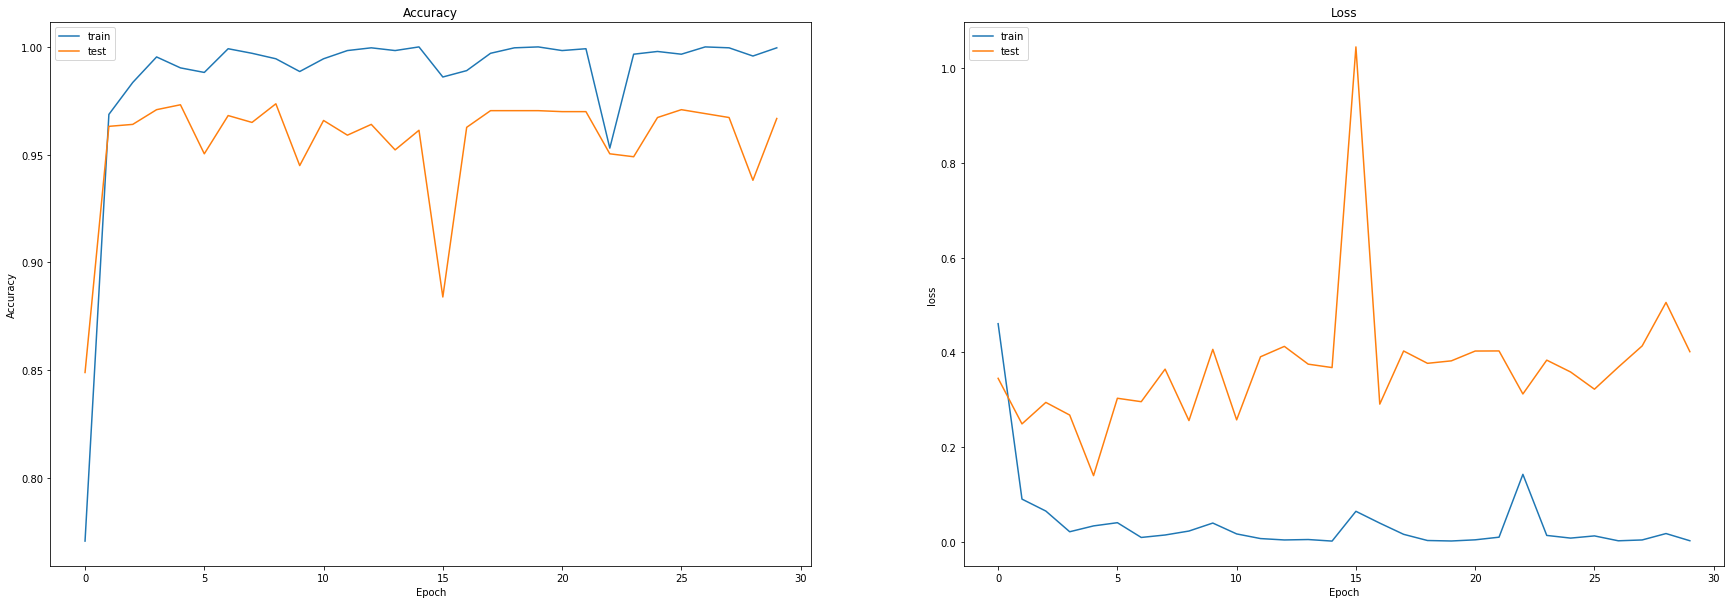

In [36]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1), plt.plot(history.history['acc']), plt.plot(history.history['val_acc']),
plt.title("Accuracy"), plt.legend(['train', 'test'], loc='upper left'), plt.xlabel("Epoch"), plt.ylabel("Accuracy")
plt.subplot(1,2,2), plt.plot(history.history['loss']), plt.plot(history.history['val_loss']),
plt.title("Loss"), plt.legend(['train', 'test'], loc='upper left'), plt.xlabel("Epoch"), plt.ylabel("loss")
#history.history['val_acc']